In [2]:
!nvidia-smi

Wed Jun  4 11:27:33 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 576.52                 Driver Version: 576.52         CUDA Version: 12.9     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4050 ...  WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   47C    P8              1W /   10W |     280MiB /   6141MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
%matplotlib inline
import albumentations as A
import cv2
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import os
import torch
from ultralytics import YOLO
import shutil
import cv2
import numpy as np
from __future__ import print_function
from PIL import Image

c:\Users\xavie\Desktop\x_ray_classifier_copy\yolo_env\Lib\site-packages\albumentations\__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.7'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [4]:
#check whether cuda is enabled
print(torch.cuda.is_available())
print(torch.cuda.current_device())
print(torch.cuda.device_count())
print(torch.cuda.get_device_name(0))
# set device to cuda
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)


True
0
1
NVIDIA GeForce RTX 4050 Laptop GPU
cuda


In [5]:
# global variables
classes = ['left_AP', 'right_AP', 'left_outlet', 'right_outlet']

In [4]:
# train the segmentation model
seg_model = YOLO('yolo11n-seg.pt')

#empty cache before training
torch.cuda.empty_cache()

seg_model.train(data='segmentation_dataset/data.yaml', epochs=20, patience=5, batch=8, verbose=True, device=[0], workers=8)

New https://pypi.org/project/ultralytics/8.3.148 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.145  Python-3.12.3 torch-2.7.0+cu128 CUDA:0 (NVIDIA GeForce RTX 4050 Laptop GPU, 6141MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=segmentation_dataset/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train4, nbs=64, nms=False, 

train: Scanning C:\Users\xavie\Desktop\x_ray_classifier_copy\segmentation_dataset\train\labels.cache... 1611 images, 6 backgrounds, 0 corrupt: 100%|██████████| 1611/1611 [00:00<?, ?it/s]

train: C:\Users\xavie\Desktop\x_ray_classifier_copy\segmentation_dataset\train\images\Left-10_well_2_jpg.rf.bd3d8a1c47a1b873c0e7ba8c1f5175fa.jpg: 1 duplicate labels removed
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access  (ping: 0.00.0 ms, read: 68.715.4 MB/s, size: 33.3 KB)


val: Scanning C:\Users\xavie\Desktop\x_ray_classifier_copy\segmentation_dataset\valid\labels.cache... 180 images, 0 backgrounds, 0 corrupt: 100%|██████████| 180/180 [00:00<?, ?it/s]


Plotting labels to c:\Users\xavie\Desktop\x_ray_classifier_copy\runs\segment\train4\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 90 weight(decay=0.0), 101 weight(decay=0.0005), 100 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to c:\Users\xavie\Desktop\x_ray_classifier_copy\runs\segment\train4
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/20      1.46G     0.4847     0.6368       1.16      1.077          9        640: 100%|██████████| 202/202 [00:49<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.35it/s]

                   all        180        181          1      0.994      0.995      0.849          1      0.994      0.995      0.893



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/20      1.95G     0.4884     0.4806     0.6083      1.052         10        640: 100%|██████████| 202/202 [00:50<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.58it/s]


                   all        180        181      0.998      0.994      0.995      0.672      0.998      0.994      0.995      0.815

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/20      1.96G     0.4962     0.4731     0.5072      1.061         11        640: 100%|██████████| 202/202 [00:40<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.28it/s]


                   all        180        181      0.973      0.994      0.995       0.87      0.973      0.994      0.995       0.93

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/20      1.96G     0.4539     0.4455      0.446      1.031         12        640: 100%|██████████| 202/202 [00:45<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.43it/s]

                   all        180        181      0.923      0.989      0.994      0.888      0.923      0.989      0.994      0.959



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/20      1.96G     0.4495     0.4506     0.4132      1.026          7        640: 100%|██████████| 202/202 [00:45<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.83it/s]

                   all        180        181      0.999      0.994      0.995      0.913      0.999      0.994      0.995       0.99



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/20      1.97G      0.408     0.3942     0.3696      1.001         10        640: 100%|██████████| 202/202 [00:47<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.16it/s]

                   all        180        181      0.998      0.994      0.995      0.824      0.998      0.994      0.995      0.945



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/20      1.99G     0.3966     0.3906      0.349      0.994         12        640: 100%|██████████| 202/202 [00:38<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.98it/s]

                   all        180        181      0.999      0.994      0.995      0.933      0.999      0.994      0.995      0.983



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/20         2G     0.3693      0.378     0.3203     0.9842         10        640: 100%|██████████| 202/202 [00:31<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  6.34it/s]

                   all        180        181      0.999      0.994      0.995      0.964      0.999      0.994      0.995      0.989



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/20         2G     0.3618     0.3716     0.3063     0.9772          8        640: 100%|██████████| 202/202 [00:41<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.28it/s]

                   all        180        181      0.998      0.994      0.995      0.965      0.998      0.994      0.995      0.982



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/20         2G     0.3478     0.3544     0.2933     0.9641         10        640: 100%|██████████| 202/202 [00:35<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.48it/s]

                   all        180        181          1      0.994      0.995      0.971          1      0.994      0.995      0.987


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/20         2G     0.2154     0.2387      0.238     0.9746          4        640: 100%|██████████| 202/202 [00:37<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.07it/s]

                   all        180        181          1      0.994      0.995      0.953          1      0.994      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/20         2G     0.1786     0.2175     0.1882     0.9392          4        640: 100%|██████████| 202/202 [00:42<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.41it/s]

                   all        180        181          1      0.994      0.995      0.995          1      0.994      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/20         2G     0.1625     0.2116      0.164     0.9349          3        640: 100%|██████████| 202/202 [00:46<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.93it/s]

                   all        180        181          1      0.994      0.995      0.989          1      0.994      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/20         2G     0.1451     0.2058     0.1522     0.9139          3        640: 100%|██████████| 202/202 [00:41<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.70it/s]

                   all        180        181          1      0.994      0.995      0.988          1      0.994      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/20         2G      0.137     0.2006     0.1436     0.9038          3        640: 100%|██████████| 202/202 [00:45<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.73it/s]

                   all        180        181          1      0.994      0.995      0.995          1      0.994      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/20         2G     0.1326     0.1996     0.1392     0.9017          3        640: 100%|██████████| 202/202 [00:45<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.02it/s]

                   all        180        181          1      0.994      0.995      0.993          1      0.994      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/20         2G     0.1228     0.1962     0.1257     0.8988          3        640: 100%|██████████| 202/202 [00:43<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.56it/s]

                   all        180        181          1      0.994      0.995      0.993          1      0.994      0.995      0.995
EarlyStopping: Training stopped early as no improvement observed in last 5 epochs. Best results observed at epoch 12, best model saved as best.pt.
To update EarlyStopping(patience=5) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



17 epochs completed in 0.226 hours.
Optimizer stripped from c:\Users\xavie\Desktop\x_ray_classifier_copy\runs\segment\train4\weights\last.pt, 6.0MB
Optimizer stripped from c:\Users\xavie\Desktop\x_ray_classifier_copy\runs\segment\train4\weights\best.pt, 6.0MB

Validating c:\Users\xavie\Desktop\x_ray_classifier_copy\runs\segment\train4\weights\best.pt...
Ultralytics 8.3.145  Python-3.12.3 torch-2.7.0+cu128 CUDA:0 (NVIDIA GeForce RTX 4050 Laptop GPU, 6141MiB)
YOLO11n-seg summary (fused): 113 layers, 2,834,763 parameters, 0 gradients, 10.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.64it/s]


                   all        180        181          1      0.994      0.995      0.995          1      0.994      0.995      0.995
Speed: 0.4ms preprocess, 4.7ms inference, 0.0ms loss, 4.3ms postprocess per image
Results saved to c:\Users\xavie\Desktop\x_ray_classifier_copy\runs\segment\train4


ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000002038C05D7C0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.0410

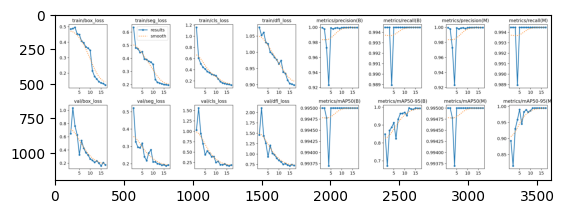

In [ ]:
plt.imshow(mpimg.imread('runs/segment/train4/results.png'))

In [6]:
# evaluate the model
seg_model = YOLO('runs/segment/train4/weights/best.pt')

In [ ]:
metrics = seg_model.val()

Ultralytics 8.3.145  Python-3.12.3 torch-2.7.0+cu128 CUDA:0 (NVIDIA GeForce RTX 4050 Laptop GPU, 6141MiB)
YOLO11n-seg summary (fused): 113 layers, 2,834,763 parameters, 0 gradients, 10.2 GFLOPs
val: Fast image access  (ping: 0.00.0 ms, read: 525.2201.5 MB/s, size: 35.7 KB)


val: Scanning C:\Users\xavie\Desktop\x_ray_classifier_copy\segmentation_dataset\valid\labels.cache... 180 images, 0 backgrounds, 0 corrupt: 100%|██████████| 180/180 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.02it/s]


                   all        180        181          1      0.994      0.995      0.995          1      0.994      0.995      0.995
Speed: 1.5ms preprocess, 7.4ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to c:\Users\xavie\Desktop\x_ray_classifier_copy\runs\segment\val


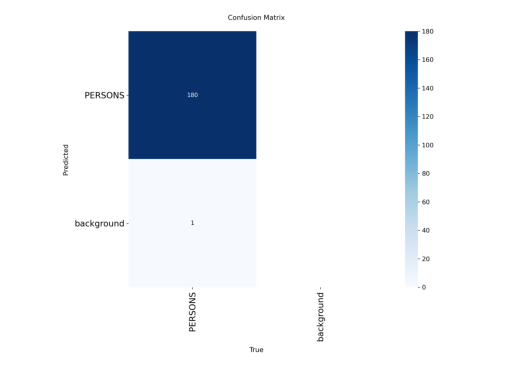

In [9]:
img = Image.open('runs/segment/val/confusion_matrix.png')

plt.imshow(img)
plt.axis('off')
plt.show()

In [23]:
# crop out segment of the image
def crop_segments(results, image):
    '''
    crop out the segment of the image
    :param results: the results of the segmentation
    :param image: the image
    :return: the cropped image
    '''
    cropped_segments = []
    for result in results:
        if result.masks is not None:
            masks = result.masks.data.cpu().numpy()
            
            for i, mask in enumerate(masks):
                 # resize mask to match image dimensions
                if mask.shape != image.shape[:2]:
                    mask = cv2.resize(mask, (image.shape[1], image.shape[0]))

                # find bounding box of the mask
                coords = np.column_stack(np.where(mask > 0.5))
                if len(coords) > 0:
                    y1, x1 = coords.min(axis=0)
                    y2, x2 = coords.max(axis=0)

                    # crop the region
                    cropped_image = image[y1:y2+1, x1:x2+1]
                    cropped_mask = mask[y1:y2+1, x1:x2+1]

                    # Create RGBA image w transparency
                    cropped_rgba = np.zeros((*cropped_image.shape[:2], 4), dtype=np.uint8)
                    cropped_rgba[:, :, 3] = (cropped_mask > 0.5) * 255 # Alpha channel
                    cropped_rgba[:, :, :3] = cropped_image

                    cropped_segments.append({
                        'image': cropped_image,
                        'rgba': cropped_rgba,
                        'mask': cropped_mask,
                        'index': i,
                        'bbox': (x1, y1, x2, y2)
                    })
    return cropped_segments

# save image method

def save_cropped_segments(segments, image_name, output_dir):
    '''save cropped segments to output_dir'''
    os.makedirs(output_dir, exist_ok=True)

    for segment in segments:
        filename = image_name.split('.')[0] + '_mask' + '.png'
        filepath = os.path.join(output_dir, filename)

        if 'rgba' in segment:
            # Save RGBA image (with transparency)
            plt.imsave(filepath, segment['rgba'])
        else:
            # save RGB image
            image_bgr = cv2.cvtColor(segment['image'], cv2.COLOR_RGB2BGR)
            cv2.imwrite(filepath, image_bgr)
        print(f'Saved: {filepath}')

def segment_images(output_path, input_path, model, classes):
    for class_name in classes:
        output_dir = os.path.join(output_path, class_name)
        shutil.rmtree(output_dir, ignore_errors=True)
        os.makedirs(output_dir, exist_ok=True)
        input_dir = os.path.join(input_path, class_name)
        
        for image_name in os.listdir(input_dir):
            image_path = os.path.join(input_dir, image_name)

            # get segmentation results

            results = model(image_path)
            image = cv2.imread(image_path)

            segments = crop_segments(results, image)
            # save cropped segments
            save_cropped_segments(segments, image_name, output_dir)

In [ ]:
# segment train images using the image segmentation model, and then save them into target folder
for class_name in classes:
    output_dir = os.path.join('cropped_segments/train', class_name)
    shutil.rmtree(output_dir, ignore_errors=True)
    input_dir = os.path.join('original_data/train/train', class_name)
    
    for image_name in os.listdir(input_dir):
        image_path = os.path.join(input_dir, image_name)

        # get segmentation results

        results = seg_model(image_path)
        image = cv2.imread(image_path)

        segments = crop_segments(results, image)
        # save cropped segments
        save_cropped_segments(segments, image_name, output_dir)


image 1/1 c:\Users\xavie\Desktop\x_ray_classifier_copy\original_data\train\train\left_AP\Left 10_ext_10.jpg: 640x640 1 PERSONS, 76.0ms
Speed: 11.0ms preprocess, 76.0ms inference, 417.2ms postprocess per image at shape (1, 3, 640, 640)
Saved: cropped_segments/train\left_AP\Left 10_ext_10_mask.png

image 1/1 c:\Users\xavie\Desktop\x_ray_classifier_copy\original_data\train\train\left_AP\Left 10_ext_12.jpg: 640x640 1 PERSONS, 84.3ms
Speed: 5.1ms preprocess, 84.3ms inference, 6.0ms postprocess per image at shape (1, 3, 640, 640)
Saved: cropped_segments/train\left_AP\Left 10_ext_12_mask.png

image 1/1 c:\Users\xavie\Desktop\x_ray_classifier_copy\original_data\train\train\left_AP\Left 10_ext_14.jpg: 640x640 1 PERSONS, 111.8ms
Speed: 4.8ms preprocess, 111.8ms inference, 5.7ms postprocess per image at shape (1, 3, 640, 640)
Saved: cropped_segments/train\left_AP\Left 10_ext_14_mask.png

image 1/1 c:\Users\xavie\Desktop\x_ray_classifier_copy\original_data\train\train\left_AP\Left 10_ext_16.jpg: 

In [33]:
# create augmentation pipeline

def crop_image(img, crop_percent):
    return img[int(crop_percent*img.shape[0]):int((1-crop_percent)*img.shape[0]), int(crop_percent*img.shape[1]):int((1-crop_percent)*img.shape[1])]

def create_val_folder(val_video_num, folder_path, src_path='original_data/train/train'):
    shutil.rmtree(folder_path + '/val', ignore_errors=True)
    for class_name in classes:
        curr_folder = os.path.join(src_path, class_name)
        output_folder = os.path.join(folder_path, 'val', class_name)
        if not os.path.exists(output_folder):
            os.makedirs(output_folder)

        # list all images in folder
        image_files = []
      
        for f in os.listdir(curr_folder):
            tokens = f.split(' ')
            if tokens[1].startswith(str(val_video_num)):
                image_files.append(f)

        for img_name in image_files:
            img_path = os.path.join(curr_folder, img_name)
            img = cv2.imread(img_path)
            if img is None:
                print(f"Could not read image: {img_path}")
                continue
            cv2.imwrite(os.path.join(output_folder, img_name), img)    

def perform_augment(augmentation, classes, folder_path, src_path, val_video_num, iteration):
      for class_name in classes:
        curr_folder = os.path.join(src_path, class_name)
        output_folder = folder_path + '/' + class_name
        if iteration == 0:
            shutil.rmtree(output_folder, ignore_errors=True)
        if not os.path.exists(output_folder):
            os.makedirs(output_folder)

        # list all images in folder
        image_files = []
      
        for f in os.listdir(curr_folder):
            tokens = f.split(' ')
            if not tokens[1].startswith(str(val_video_num)):
                image_files.append(f)

        for img_name in image_files:
            img_path = os.path.join(curr_folder, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)
            if img is None:
                print(f"Could not read image: {img_path}")
                continue

            # check for alpha channel
            has_alpha = img.shape[2] == 4 if len(img.shape) == 3 else False

            if has_alpha:
                #split BGRA channels
                bgr = img[:, :, :3]
                alpha = img[:, :, 3]

                # get image dimensions
                h, w = bgr.shape[:2]

                # calc middle coordinate
                middle_x = w // 2

                bgr = np.ascontiguousarray(bgr)

                # draw line down middle of bgr only
                cv2.line(bgr, (middle_x, 0), (middle_x, h), (0, 255, 0), 2)

                # perform augmentation
                rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

                # create RGBA for augmentation
                rgba_for_aug = np.dstack((rgb, alpha))

                # perform augmentation on RGBA
                augmented= augmentation(image=rgba_for_aug)['image']

                # split augmented channels
                aug_rgb = augmented[:, :, :3]
                aug_alpha = augmented[:, :, 3]

                # Convert back to BGR
                aug_bgr = cv2.cvtColor(aug_rgb, cv2.COLOR_RGB2BGR)

                # Recombine w alpha
                final_image = np.dstack((aug_bgr, aug_alpha))

                # Save as PNG to preserve transparency
                img_name_base = img_name.split('.')[0]
                save_name = f"{img_name_base}_{iteration}.png"

            else:
                print(f"No alpha channel in image: {img_path}")
                continue

            save_path = os.path.join(output_folder, save_name)
            cv2.imwrite(save_path, final_image)

def augment_images(degrees, classes, folder_path, src_path, iterations):
    augmentation = A.Compose([
        A.Rotate(limit=(-1 * degrees, degrees)),
    ])

    for i in range(iterations):
        print('Performing augmentation iteration ' + str(i) + '...')
        perform_augment(augmentation, classes, folder_path, src_path, 14, i)

    print(f'Augmentation complete in destination folder: {folder_path}')

In [34]:
# augment images in train_folder
augment_images(35, classes, 'cropped_segments/train3', 'cropped_segments/train', 4)

Performing augmentation iteration 0...
Performing augmentation iteration 1...
Performing augmentation iteration 2...
Performing augmentation iteration 3...
Augmentation complete in destination folder: cropped_segments/train3


In [24]:
# segment test images from the model, and save into new test_dir
segment_images(output_path='test_seg/test', input_path='test/test', model=seg_model, classes=classes)


image 1/1 c:\Users\xavie\Desktop\x_ray_classifier_copy\test\test\left_AP\Left 15_ext_10.jpg: 608x640 1 PERSONS, 124.4ms
Speed: 4.2ms preprocess, 124.4ms inference, 9.6ms postprocess per image at shape (1, 3, 608, 640)
Saved: test_seg/test\left_AP\Left 15_ext_10_mask.png

image 1/1 c:\Users\xavie\Desktop\x_ray_classifier_copy\test\test\left_AP\Left 15_ext_12.jpg: 576x640 1 PERSONS, 76.6ms
Speed: 4.5ms preprocess, 76.6ms inference, 3.2ms postprocess per image at shape (1, 3, 576, 640)
Saved: test_seg/test\left_AP\Left 15_ext_12_mask.png

image 1/1 c:\Users\xavie\Desktop\x_ray_classifier_copy\test\test\left_AP\Left 15_ext_14.jpg: 608x640 1 PERSONS, 60.2ms
Speed: 4.4ms preprocess, 60.2ms inference, 4.3ms postprocess per image at shape (1, 3, 608, 640)
Saved: test_seg/test\left_AP\Left 15_ext_14_mask.png

image 1/1 c:\Users\xavie\Desktop\x_ray_classifier_copy\test\test\left_AP\Left 15_ext_16.jpg: 576x640 1 PERSONS, 87.0ms
Speed: 4.3ms preprocess, 87.0ms inference, 7.6ms postprocess per ima

In [25]:
# segment validation images, and add them to training folder
segment_images(output_path='cropped_segments/val', input_path='original_data/val', model=seg_model, classes=classes)


image 1/1 c:\Users\xavie\Desktop\x_ray_classifier_copy\original_data\val\left_AP\Left 14_ext_10.jpg: 608x640 1 PERSONS, 49.6ms
Speed: 5.0ms preprocess, 49.6ms inference, 12.0ms postprocess per image at shape (1, 3, 608, 640)
Saved: cropped_segments/val\left_AP\Left 14_ext_10_mask.png

image 1/1 c:\Users\xavie\Desktop\x_ray_classifier_copy\original_data\val\left_AP\Left 14_ext_12.jpg: 640x640 1 PERSONS, 69.8ms
Speed: 5.2ms preprocess, 69.8ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)
Saved: cropped_segments/val\left_AP\Left 14_ext_12_mask.png

image 1/1 c:\Users\xavie\Desktop\x_ray_classifier_copy\original_data\val\left_AP\Left 14_ext_14.jpg: 640x640 1 PERSONS, 89.8ms
Speed: 3.9ms preprocess, 89.8ms inference, 6.4ms postprocess per image at shape (1, 3, 640, 640)
Saved: cropped_segments/val\left_AP\Left 14_ext_14_mask.png

image 1/1 c:\Users\xavie\Desktop\x_ray_classifier_copy\original_data\val\left_AP\Left 14_ext_16.jpg: 608x640 1 PERSONS, 85.4ms
Speed: 4.7ms pre